<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [31]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [32]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Familialize with the dataset

In [33]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 2: Generate basic statistics and visualizations for upper management

In [24]:
# Basic statistics
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [ ]:
# Visualization

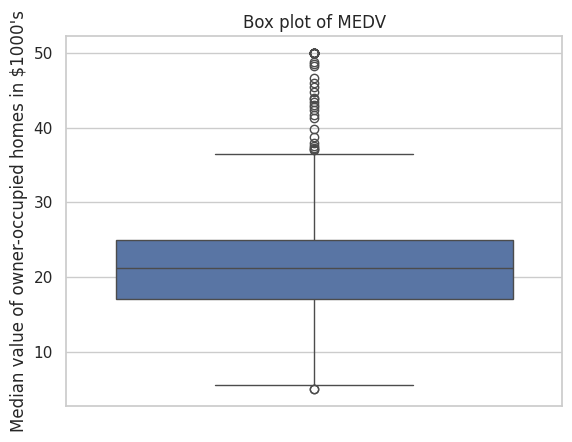

In [21]:
# For the "Median value of owner-occupied homes" provide a boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(y="MEDV", data=boston_df)
ax.set_title('Box plot of MEDV')
ax.set_ylabel("Median value of owner-occupied homes in $1000's")
pyplot.show()

Median value of owner-occupied homes ranges from 5 to 50, with the mean is approximately 22.5. There are some outliers.

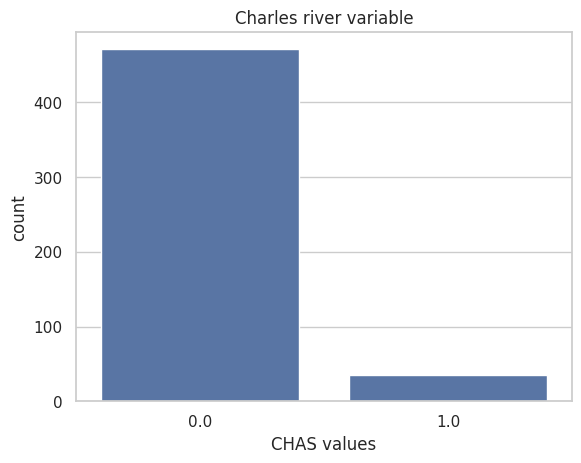

In [36]:
# Provide a  bar plot for the Charles river variable
sns.set(style="whitegrid")
ax = sns.countplot(x="CHAS", data=boston_df)
ax.set_title('Charles river variable')
ax.set_ylabel("count")
ax.set_xlabel("CHAS values")
pyplot.show()

Charles River dummy variable has 0 for 25th, 50th and 75th percentiles. Most house has tract bounds river.

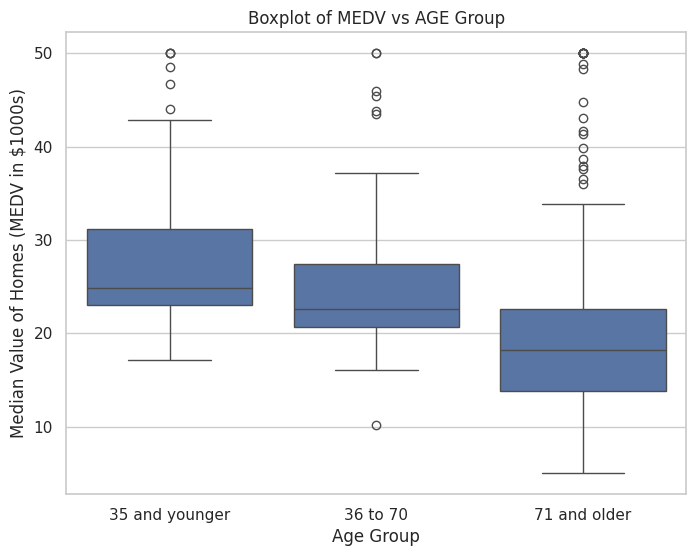

In [40]:
# Discretizing the 'AGE' variable into three groups
bins = [0, 35, 70, float('inf')]  # Age bins: 35 and younger, 36-70, 71 and older
labels = ['35 and younger', '36 to 70', '71 and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

# Creating the boxplot
pyplot.figure(figsize=(8, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV vs AGE Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of Homes (MEDV in $1000s)')
pyplot.show()

- median home values in the younger groups tends to be higher than older groups, which might suggests that generally homes of younger ages tend to have higher prices.
- 71 and older age group has more outliers and a wider spread, which may indicate a larger disparity in home values within this group.

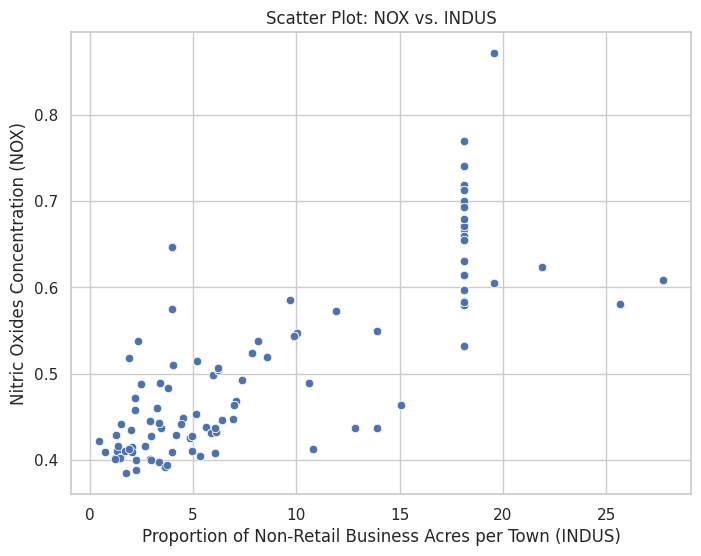

In [46]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
pyplot.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Scatter Plot: NOX vs. INDUS')
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxides Concentration (NOX)')
pyplot.show()

There seems to be an up ward trending - might be a positive correlation: as the proportion of non-retail business acres per town increases, Nitric oxide concentrations also tends to increase.

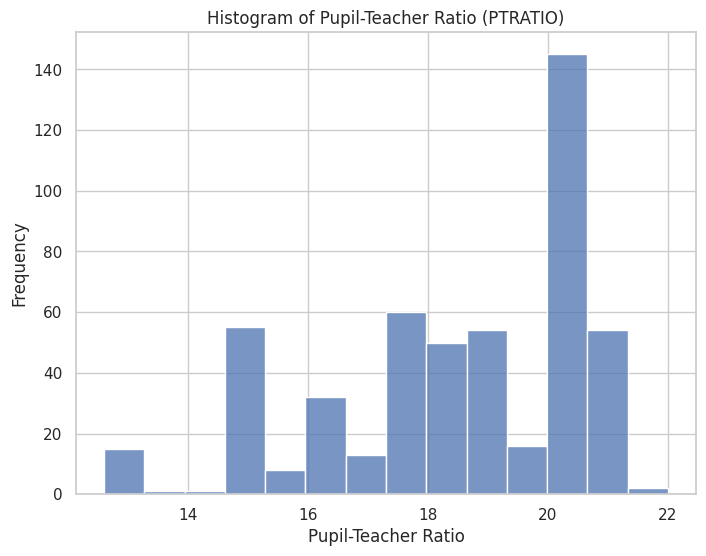

In [48]:
#Create a histogram for the pupil to teacher ratio variable
pyplot.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'])
pyplot.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')

# Show the plot
pyplot.show()

The histogram shows the distribution of pupil-teacher ratios.

## Task 3: Use the appropriate tests to answer the questions provided.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#### Hypothesis:
*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in the median value of houses between those bounded by the Charles River (CHAS = 1) and those not bounded by the river (CHAS = 0)")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in in the median value of houses between those bounded by the Charles River (CHAS = 1) and those not bounded by the river (CHAS = 0)")

#### Significance level:
α = 0.05

In [50]:
# Perform the t-test for independent samples
t_stat, p_value = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], 
                                  boston_df[boston_df['CHAS'] == 0]['MEDV'])

# Output the results
t_stat, p_value

(3.996437466090509, 7.390623170519905e-05)

**Conclusion:** Since the p-value is much smaller than the significance level (α = 0.05), we reject the null hypothesis  as there is enough proof that there is a statistical difference in in the median value of houses between those bounded by the Charles River and those not bounded by the river 

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
Consider 3 AGE group 35 and younger, 36-70, 71 and older

#### Hypothesis:
*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three age group means are equal)
*   $H\_1:$ At least one of the means differ

#### Significance level:
α = 0.05

Test for equality of variance

In [55]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == '36 to 70']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '71 and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the p-value is greater than 0.05, we fail to reject the null hypothesis of equal variances. This suggests that the assumption of homogeneity of variances holds, meaning the variances across the groups are not significantly different.
=> it is possible to perform the ANOVA test

In [58]:
thirtyfive_lower = boston_df[boston_df['AGE_GROUP'] == '35 and younger']['MEDV']
thirtysix_seventy = boston_df[boston_df['AGE_GROUP'] == '36 to 70']['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == '71 and older']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtysix_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** p value is less than 0.05, we reject the null hypothesis.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#### Hypothesis:
*   $H\_0: r = 0 (There is no linear relationship between NOX and INDUS)
*   $H\_1:$ r ≠ 0 (There is a linear relationship between NOX and INDUS)

#### Significance level:
α = 0.05

In [61]:
# Perform Pearson correlation test
corr_coefficient, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Output the results
corr_coefficient, p_value

(0.7636514469209192, 7.913361061210442e-98)

**Conclusion:** Since the p-value is smaller than 0.05, we reject the null hypothesis that there is no linear relationship between NOX and INDUS.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
#### Hypothesis:
*   $H\_0: There is no significant relationship between DIS and MEDV (The coefficient for DIS is 0)
*   $H\_1:$ There is a significant relationship between DIS and MEDV (The coefficient for DIS is not 0)

#### Significance level:
α = 0.05


In [64]:
X = boston_df['DIS']  
y = boston_df['MEDV']  
X = sm.add_constant(X)

# Perform the regression
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        12:00:09   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** 
- The p-value is less than 0.05, we can reject the null hypothesis that there is no relationship between the two variables. 
- Impact of an additional weighted distance to the five Boston employment centres: an increase in the weighted distance to the five Boston employment centers results in an increase in the median home value